# Download the data

In [1]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

In [2]:
import os
import urllib
import urllib.request
if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

In [3]:
from zipfile import ZipFile
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

Unzipping images...


In [4]:
import os
labels = os.listdir('fashion_mnist_images/train')
print(labels)

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


In [5]:
import cv2

image_data = cv2.imread('fashion_mnist_images/train/7/0002.png',
cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  49
  135 182 150  59   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)

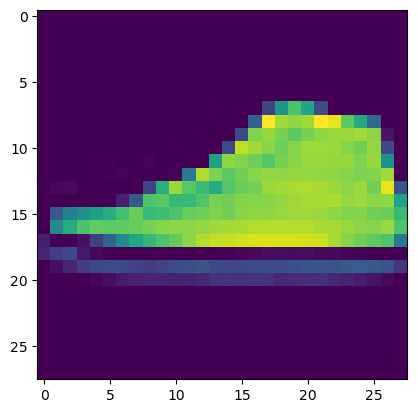

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image_data)
plt.show()

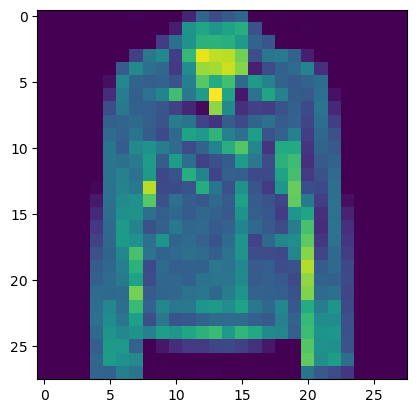

In [8]:
image_data = cv2.imread('fashion_mnist_images/train/4/0011.png',
cv2.IMREAD_UNCHANGED)
plt.imshow(image_data)
plt.show()

In [9]:
# Scan all the directories and create a list of labels
labels = os.listdir('fashion_mnist_images/train')
# Create lists for samples and labels
X = []
y = []
# For each label folder
for label in labels:
    # And for each image in given folder
    for file in os.listdir(os.path.join(
    'fashion_mnist_images', 'train', label
    )):
        # Read the image
        image = cv2.imread(os.path.join(
        'fashion_mnist_images/train', label, file
        ), cv2.IMREAD_UNCHANGED)
        # And append it and a label to the lists
        X.append(image)
        y.append(label)

# Load the data

In [10]:
import numpy as np
import cv2
import os
# Loads a MNIST dataset
def load_mnist_dataset(dataset, path):
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(
            path, dataset, label, file
            ), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

In [11]:
# MNIST dataset (train + test)
def create_data_mnist(path):
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    # And return all the data
    return X, y, X_test, y_test

In [12]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

# Data preprocessing

In [13]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')
# Scale features
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

In [14]:
example = np.array([[1,2],[3,4]])
flattened = example.reshape(-1)
print(example)
print(example.shape)
print(flattened)
print(flattened.shape)

[[1 2]
 [3 4]]
(2, 2)
[1 2 3 4]
(4,)


In [15]:
# Reshape to vectors
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Data Shuffling

In [16]:
keys = np.array(range(X.shape[0]))
print(keys[:10])

[0 1 2 3 4 5 6 7 8 9]


In [17]:
import nnfs
nnfs.init()
np.random.shuffle(keys)
print(keys[:10])

[ 3048 19563 58303  8870 40228 31488 21860 56864   845 25770]


In [18]:
X = X[keys]
y = y[keys]

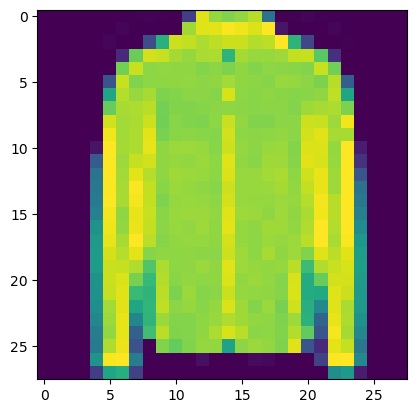

In [19]:
plt.imshow((X[4].reshape(28, 28))) # Reshape as image is a vector already
plt.show()

# Batches

In [20]:
EPOCHS = 10
BATCH_SIZE = 128

# Calculate number of steps
steps = X.shape[0] // BATCH_SIZE
# Dividing rounds down. If there are some remaining data,
# but not a full batch, this won't include it.
# Add 1 to include the remaining samples in 1 more step.
if steps * BATCH_SIZE < X.shape[0]:
    steps += 1

for epoch in range(EPOCHS):
    for step in range(steps):
        batch_X = X[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        batch_y = y[step*BATCH_SIZE:(step+1)*BATCH_SIZE]
        # Now we perform forward pass, loss calculation,
        # backward pass and update parameters

In [21]:
# Input 'layer'
class Layer_Input:
    # Forward pass
    def forward(self, inputs, training):
        self.output = inputs

In [22]:
# Dense layer
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, weight_regularizer_l1=0,
                 weight_regularizer_l2=0, bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradient on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

    # Set weights and biases in a layer instance
    def set_parameters(self, weights, biases):
        self.weights = weights
        self.biases = biases

    # Get weights and biases
    def get_parameters(self):
        return self.weights, self.biases

In [23]:
# Dropout
class Layer_Dropout:
    # init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate

        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask

In [24]:
# Relu activation
class Activation_ReLU:     
    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable
        # Let's make a copy of the values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

    # Prediction
    def predictions(self, outputs):
        return outputs

In [25]:
class Activation_Softmax:
    def forward(self, inputs, training):
        self.inputs = inputs

        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    def backward(self, dvalues):
        # Create uninitiated array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):

            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)

In [26]:
# Sigmoid activation
class Activation_Sigmoid:
    # Forward pass
    def forward(self, inputs, training):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return (outputs > 0.5) * 1

In [27]:
# Linear activation
class Activation_Linear:
    # Forward pass
    def forward(self, inputs, training):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return outputs

In [28]:
# SGD optimizer
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If we use momentum
        if self.momentum:
            # If layer does not contain momentum arrays, create them filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum
            weight_updates = self.momentum * layer.weight_momentums - \
                             self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates with momentum
            bias_updates = self.momentum * layer.bias_momentums - \
                           self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            # Vanilla SGD updates (no momentum)
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [29]:
# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1.0, decay=0, eps=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.eps = eps

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeroes
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD paramter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.eps)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.eps)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [30]:
# RMSprop optimizer
class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0, eps=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.eps = eps
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeroes
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD paramter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.eps)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.eps)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [31]:
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeroes
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))
    
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))
    
        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
        weight_momentums_corrected / \
        (np.sqrt(weight_cache_corrected) +
        self.epsilon)
        layer.biases += -self.current_learning_rate * \
        bias_momentums_corrected / \
        (np.sqrt(bias_cache_corrected) +
        self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [32]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses
    def regularization_loss(self):
        # 0 by default
        regularization_loss = 0

        # Calculate regularization loss
        # itrate all trainable layers
        for layer in self.trainable_layers:
        
            # L1 regularization - weights
            # calculate only when factor greater than 0
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
    
            # L2 regularization - weights
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
    
            # L1 regularization - biases
            # calculate only when factor greater than 0
            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
            # L2 regularization - biases
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(np.abs(layer.biases * layer.biases))
    
        return regularization_loss

    # Set/remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
    
    # given model output and ground truth values
    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Add accumulated sum of losses and sample count
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return loss and regularization loss
        return data_loss, self.regularization_loss()

    # Calculates accumulated loss
    def calculate_accumulated(self, *, include_regularization=False):
        # Calculate mean loss
        data_loss = self.accumulated_sum / self.accumulated_count
        # If just data loss - return it
        if not include_regularization:
            return data_loss
        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Reset variables for accumulated loss
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0

In [33]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) 
        # Ensure any of the probabilities is neither 0 or 1

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis =1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We will use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [34]:
# Binary cross-entropy loss
class Loss_BinaryCrossEntropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])
        clipped_values = np.clip(dvalues, 1e-7, 1-1e-7)
        # Calculate gradient
        self.dinputs = -((y_true / clipped_values) - (1 - y_true) / (1 - clipped_values)) / outputs
        self.dinputs = self.dinputs / samples

In [35]:
# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):
        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We will use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normlaize gradient
        self.dinputs = self.dinputs / samples

In [36]:
# Mean Absolute Error loss
class Loss_MeanAbsoluteError(Loss):
    def forward(self, y_pred, y_true):
        sample_losses = np.mean(np.abs(y_pred - y_true), axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We will use the first sammple to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [37]:
# Common accuracy class
class Accuracy:
    # Calculates an accuracy
    # given predictions and ground truth values
    def calculate(self, predictions, y):
        # Get comparison results
        comparisons = self.compare(predictions, y)
        
        # Calculate batch accuracy
        accuracy = np.mean(comparisons)
        
        # Update accumulated values (FIXED PART)
        self.accumulated_sum += np.sum(comparisons)  # Sum of correct predictions
        self.accumulated_count += len(comparisons)   # Total samples in batch
        
        return accuracy

    # Calculates accumulated accuracy
    def calculate_accumulated(self):
        if self.accumulated_count == 0:
            return 0.0 
        return self.accumulated_sum / self.accumulated_count

    # Reset variables for accumulated accuracy
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0

In [38]:
# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):
    # No initialization is needed
    def init(self, y):
        pass
    # Compares predictions to the ground truth values
    def compare(self, predictions, y):
        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y

In [39]:
# Accuracy calculation for regression model
class Accuracy_Regression(Accuracy):
    def __init__(self):
        # Create precision property
        self.precision = None

    # Calculate precision value
    # baed on passed in ground truth
    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    # Compare predictions to the ground truth values
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision

In [52]:
import copy

In [72]:
# Model class
class Model:
    def __init__(self):
        # Create a list of network objects
        self.layers = []
        # Placeholder for softmax classifier/loss combination
        self.softmax_classifier_output = None

    # Add objects to the model
    def add(self, layer):
        self.layers.append(layer)

    # Set loss, optimizer, and accuracy
    def set(self, *, loss=None, optimizer=None, accuracy=None):
        if loss is not None:
            self.loss = loss
        if optimizer is not None:
            self.optimizer = optimizer
        if accuracy is not None:
            self.accuracy = accuracy

    # Evaluates the model using passed in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None):
        # Default value is batch size is not being set
        validation_steps = 1
        # Calculate number of steps
        if batch_size is not None:
            validation_steps = len(X_val) // batch_size
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1
    
        # Reset accumulated values in loss
        # and accuracy objects
        self.loss.new_pass()
        self.accuracy.new_pass()
    
        # Iterate over steps
        for step in range(validation_steps):
            # If batch size is not set -
            # train using one step and full dataset
            if batch_size is None:
                batch_X = X_val
                batch_y = y_val
    
            # Otherwise slice a batch
            else:
                batch_X = X_val[
                    step*batch_size:(step+1)*batch_size
                ]
                batch_y = y_val[
                    step*batch_size:(step+1)*batch_size
                ]
    
            # Perform the forward pass
            output = self.forward(batch_X, training=False)
    
            # Calculate the loss
            self.loss.calculate(output, batch_y)
    
            # Get predictions and calculate an accuracy
            predictions = self.output_layer_activation.predictions(output)
            self.accuracy.calculate(predictions, batch_y)
            # Get and print validation loss and accuracy
            validation_loss = self.loss.calculate_accumulated()
            validation_accuracy = self.accuracy.calculate_accumulated()
            # Print a summary
            print(f'validation, ' +
                f'acc: {validation_accuracy:.3f}, ' +
                f'loss: {validation_loss:.3f}')

    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None, print_every=1, validation_data=None):
        # Initialize accuracy object
        self.accuracy.init(y)

        # Default value if batch size is not set
        train_steps = 1
        if validation_data is not None:
            validation_steps = 1
            X_val, y_val = validation_data

        if batch_size is not None:
            train_steps = len(X) // batch_size
            if train_steps * batch_size < len(X):
                train_steps += 1

            if validation_data is not None:
                validation_steps = len(X_val) // batch_size
                if validation_steps * batch_size < len(X_val):
                    validation_steps += 1

        for epoch in range(1, epochs + 1):
            print(f'epoch: {epoch}')
            self.loss.new_pass()
            self.accuracy.new_pass()

            for step in range(train_steps):
                if batch_size is None:
                    batch_X = X
                    batch_y = y
                else:
                    batch_X = X[step * batch_size:(step + 1) * batch_size]
                    batch_y = y[step * batch_size:(step + 1) * batch_size]

                output = self.forward(batch_X, training=True)
                data_loss, regularization_loss = self.loss.calculate(output, batch_y, include_regularization=True)
                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)
                accuracy = self.accuracy.calculate(predictions, batch_y)

                self.backward(output, batch_y)

                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

                if not step % print_every or step == train_steps - 1:
                    print(f'step: {step}, ' +
                          f'acc: {accuracy:.3f}, ' +
                          f'loss: {loss:.3f} (' +
                          f'data_loss: {data_loss:.3f}, ' +
                          f'reg_loss: {regularization_loss:.3f}), ' +
                          f'lr: {self.optimizer.current_learning_rate}')

            epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()
            print(f'training, ' +
                  f'acc: {epoch_accuracy:.3f}, ' +
                  f'loss: {epoch_loss:.3f} (' +
                  f'data_loss: {epoch_data_loss:.3f}, ' +
                  f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                  f'lr: {self.optimizer.current_learning_rate}')

            if validation_data is not None:
                self.evaluate(*validation_data, batch_size=batch_size)

    # Finalize the model
    def finalize(self):
        self.input_layer = Layer_Input()
        layer_count = len(self.layers)
        self.trainable_layers = []

        for i in range(layer_count):
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i + 1]
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.layers[i + 1]
            else:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.loss

            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        self.loss.remember_trainable_layers(self.trainable_layers)
        self.output_layer_activation = self.layers[-1]
        # Update loss object with trainable layers
        if self.loss is not None:
            self.loss.remember_trainable_layers(self.trainable_layers)

    # Forward pass
    def forward(self, X, training):
        self.input_layer.forward(X, training)
        for layer in self.layers:
            layer.forward(layer.prev.output, training)
        return self.layers[-1].output

    # Backward pass
    def backward(self, output, y):
        if self.softmax_classifier_output is not None:
            self.softmax_classifier_output.backward(output, y)
            self.layers[-1].dinputs = self.softmax_classifier_output.dinputs
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)
            return

        self.loss.backward(output, y)
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

    # Retrieves and returns parameters of trainable layers
    def get_parameters(self):
        # Create a list for parameters
        parameters = []
        # Iterable trainable layers and get their parameters
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())
        # Return a list
        return parameters

    # Updates the model with new parameters
    def set_parameters(self, parameters):
        # Iterate over the parameters and layers
        # and update each layers with each set of the parameters
        for parameter_set, layer in zip(parameters, self.trainable_layers):
            layer.set_parameters(*parameter_set)

    # Saves the parameters to a file
    def save_parameters(self, path):
        # Open a file in the binary-write mode
        # and save parameters to it
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)

    # Loads the weights and updates a model instance with them
    def load_parameters(self, path):
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))

    # Saves the model
    def save(self, path):
        # Make a deep copy of current model instance
        model = copy.deepcopy(self)

        # Reset accumulated values in loss and accuracy objects
        model.loss.new_pass()
        model.accuracy.new_pass()

        # Remove data from the input layer
        # and gradients from the loss object
        model.input_layer.__dict__.pop('output', None)
        model.loss.__dict__.pop('dinputs', None)

        # For each layer remove inputs, output and dinputs properties
        for layer in model.layers:
            for property in ['inputs', 'output', 'dinputs', 'dweights', 'dbiases']:
                layer.__dict__.pop(property, None)
            
        # Open a file in the binary-write mode and save the model
        with open(path, 'wb') as f:
            pickle.dump(model, f)

    # Loads and returns a model
    @staticmethod
    def load(path):
        # Open file in the binary-read mode, load a model
        with open(path, 'rb') as f:
            model = pickle.load(f)

        # Return a model
        return model

    # Predicts on the samples
    def predict(self, X, *, batch_size=None):
        
        # Default value if batch size is not being set
        prediction_steps = 1
        
        # Calculate number of steps
        if batch_size is not None:
            prediction_steps = len(X) // batch_size
            # Dividing rounds down. If there are some remaining
            # data, but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if prediction_steps * batch_size < len(X):
                prediction_steps += 1
            
        # Model outputs
        output = []
        
        # Iterate over steps
        for step in range(prediction_steps):
            # If batch size is not set -
            # train using one step and full dataset
            if batch_size is None:
                batch_X = X
            # Otherwise slice a batch
            else:
                batch_X = X[step*batch_size:(step+1)*batch_size]
            # Perform the forward pass
            batch_output = self.forward(batch_X, training=False)
            # Append batch prediction to the list of predictions
            output.append(batch_output)
        # Stack and return results
        return np.vstack(output)

# Training

In [41]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) -
127.5) / 127.5

In [73]:
# Instantiate the model
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 64))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 10))
model.add(Activation_Softmax())

# Set loss, optimizer and accuracy objects
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=5e-5),
    accuracy=Accuracy_Categorical()
)
# Finalize the model
model.finalize()
# Train the model
model.train(X, y, validation_data=(X_test, y_test),
epochs=5, batch_size=128, print_every=100)

epoch: 1
step: 0, acc: 0.172, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.719, loss: 0.743 (data_loss: 0.743, reg_loss: 0.000), lr: 0.0009950248756218907
step: 200, acc: 0.789, loss: 0.702 (data_loss: 0.702, reg_loss: 0.000), lr: 0.0009900990099009901
step: 300, acc: 0.812, loss: 0.468 (data_loss: 0.468, reg_loss: 0.000), lr: 0.0009852216748768474
step: 400, acc: 0.820, loss: 0.593 (data_loss: 0.593, reg_loss: 0.000), lr: 0.000980392156862745
step: 468, acc: 0.823, loss: 0.491 (data_loss: 0.491, reg_loss: 0.000), lr: 0.0009771350400625367
training, acc: 0.718, loss: 0.749 (data_loss: 0.749, reg_loss: 0.000), lr: 0.0009771350400625367
validation, acc: 0.945, loss: 0.139
validation, acc: 0.949, loss: 0.139
validation, acc: 0.930, loss: 0.170
validation, acc: 0.934, loss: 0.170
validation, acc: 0.944, loss: 0.151
validation, acc: 0.948, loss: 0.145
validation, acc: 0.946, loss: 0.155
validation, acc: 0.941, loss: 0.170
validation, acc: 0.920, loss: 0.236
v

# Model Evaluation

In [74]:
# Create dataset
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')
# Shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]
# Scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5
# Instantiate the model
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())
# Set loss, optimizer and accuracy objects
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(decay=1e-3),
    accuracy=Accuracy_Categorical()
)
# Finalize the model
model.finalize()
# Train the model
model.train(X, y, validation_data=(X_test, y_test), epochs=10, batch_size=128, print_every=100)

epoch: 1
step: 0, acc: 0.086, loss: 2.303 (data_loss: 2.303, reg_loss: 0.000), lr: 0.001
step: 100, acc: 0.727, loss: 0.696 (data_loss: 0.696, reg_loss: 0.000), lr: 0.0009090909090909091
step: 200, acc: 0.812, loss: 0.649 (data_loss: 0.649, reg_loss: 0.000), lr: 0.0008333333333333334
step: 300, acc: 0.781, loss: 0.628 (data_loss: 0.628, reg_loss: 0.000), lr: 0.0007692307692307692
step: 400, acc: 0.812, loss: 0.536 (data_loss: 0.536, reg_loss: 0.000), lr: 0.0007142857142857143
step: 468, acc: 0.833, loss: 0.455 (data_loss: 0.455, reg_loss: 0.000), lr: 0.000681198910081744
training, acc: 0.758, loss: 0.660 (data_loss: 0.660, reg_loss: 0.000), lr: 0.000681198910081744
validation, acc: 0.922, loss: 0.239
validation, acc: 0.930, loss: 0.225
validation, acc: 0.914, loss: 0.252
validation, acc: 0.916, loss: 0.257
validation, acc: 0.925, loss: 0.234
validation, acc: 0.928, loss: 0.223
validation, acc: 0.927, loss: 0.232
validation, acc: 0.925, loss: 0.248
validation, acc: 0.900, loss: 0.311
va

In [75]:
parameters = model.get_parameters()

In [76]:
model.set_parameters(parameters)

In [77]:
# Evaluate the model
model.evaluate(X_test, y_test)

validation, acc: 0.872, loss: 0.358


# Saving Parameters

In [78]:
import pickle

In [79]:
model.save_parameters('fashion_mnist.parms')

model.save('fashion_mnist.model')

model = Model.load('fashion_mnist.model')

# Prediction/Inference

In [91]:
# Predict on the first 5 samples from validation dataset
# and print the result
confidences = model.predict(X_test[:10])
print(confidences)

[[2.3235634e-06 5.4504189e-06 1.3792906e-07 1.8784121e-06 1.9941680e-08 2.9539813e-03 1.6619454e-07 1.0636183e-03 5.0342771e-07 9.9597186e-01]
 [2.0049891e-09 4.0154222e-09 9.8212341e-11 1.4655454e-08 1.1969134e-10 8.6525673e-05 1.6515129e-09 1.5844597e-02 5.3046992e-06 9.8406351e-01]
 [2.8690608e-06 1.2095607e-06 3.2037498e-08 9.9404690e-07 1.6935587e-09 1.1243765e-02 6.6337069e-09 8.3305147e-03 1.4526491e-05 9.8040605e-01]
 [1.6122308e-06 2.4565222e-07 2.0918116e-09 9.4786344e-08 7.5437510e-11 3.2022949e-02 1.8768553e-09 1.4054976e-02 2.1136093e-05 9.5389903e-01]
 [1.7426168e-09 6.6433326e-10 4.4490895e-12 1.5621661e-10 2.2314140e-13 2.3109384e-05 8.4007063e-12 4.1622648e-04 2.5635080e-08 9.9956065e-01]
 [2.6979894e-09 2.4188958e-09 1.4101793e-12 1.3416060e-10 4.0655866e-13 1.7546439e-03 6.2037923e-11 2.7516185e-06 3.8930695e-10 9.9824262e-01]
 [6.2281214e-07 1.6973397e-07 7.1548605e-08 3.8755832e-07 2.3197160e-09 7.5783953e-04 3.7351374e-08 2.7741536e-02 4.7824788e-06 9.7149456e-01]

In [92]:
predictions = model.output_layer_activation.predictions(confidences)
print(predictions)

[9 9 9 9 9 9 9 9 9 7]


In [93]:
# Print first 5 labels
print(y_test[:10])

[9 9 9 9 9 9 9 9 9 9]


In [94]:
# Label index to label name relation
fashion_mnist_labels = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

In [95]:
for pic in predictions:
    print(fashion_mnist_labels[pic])

Ankle boot
Ankle boot
Ankle boot
Ankle boot
Ankle boot
Ankle boot
Ankle boot
Ankle boot
Ankle boot
Sneaker
